In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')


Initial Iris Data Head:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

--- Iris Decision Tree Model Performance ---
Accuracy: 0.93


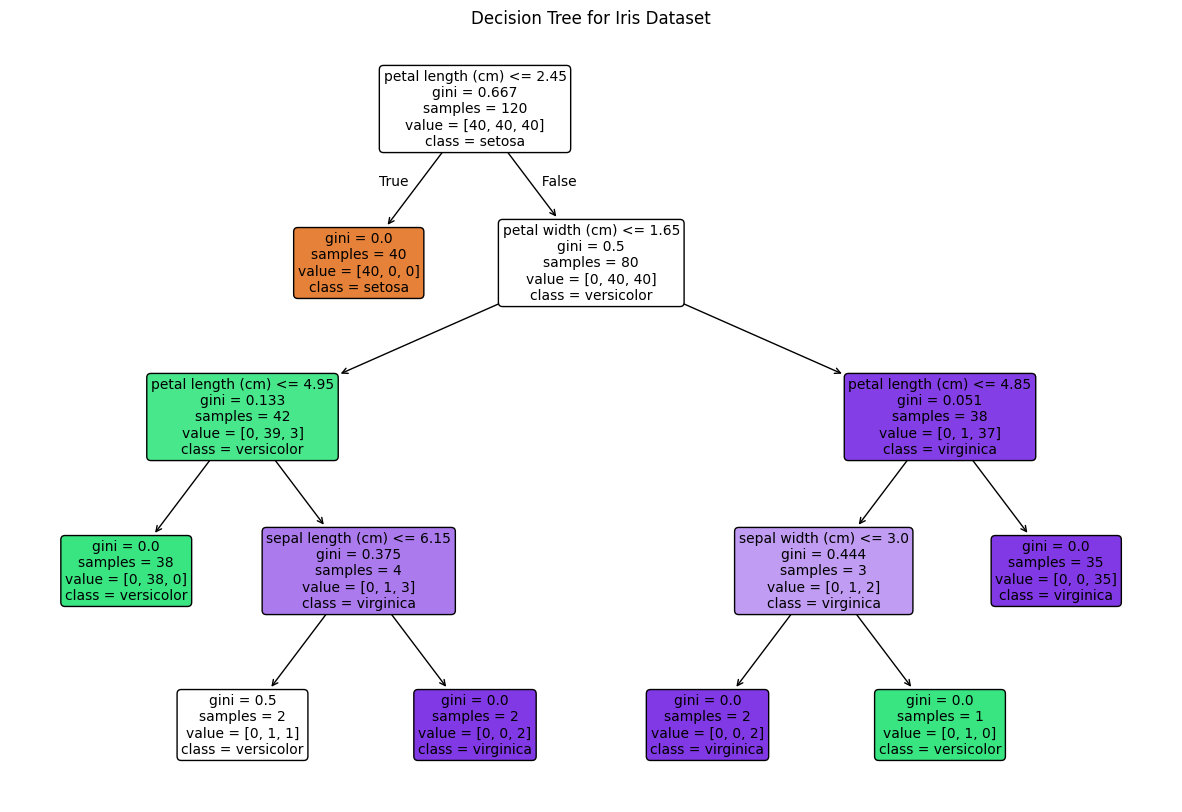

In [9]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
print("\nInitial Iris Data Head:\n", iris_df.head())

# Split features and target
X = iris_df.drop('species', axis=1)
y = iris_df['species']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train a Decision Tree Classifier with fixed parameters
dt_model = DecisionTreeClassifier(max_depth=4, criterion='gini', random_state=42)
dt_model.fit(X_train, y_train)

# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
print("\n--- Iris Decision Tree Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

# Visualize the tree
plt.figure(figsize=(15, 10))
plot_tree(dt_model,
          feature_names=iris.feature_names,
          class_names=iris.target_names,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree for Iris Dataset")
plt.show()


Wine Train set size: 1279 samples
Wine Test set size: 320 samples

--- Wine Decision Tree Model Performance ---
Accuracy: 0.90


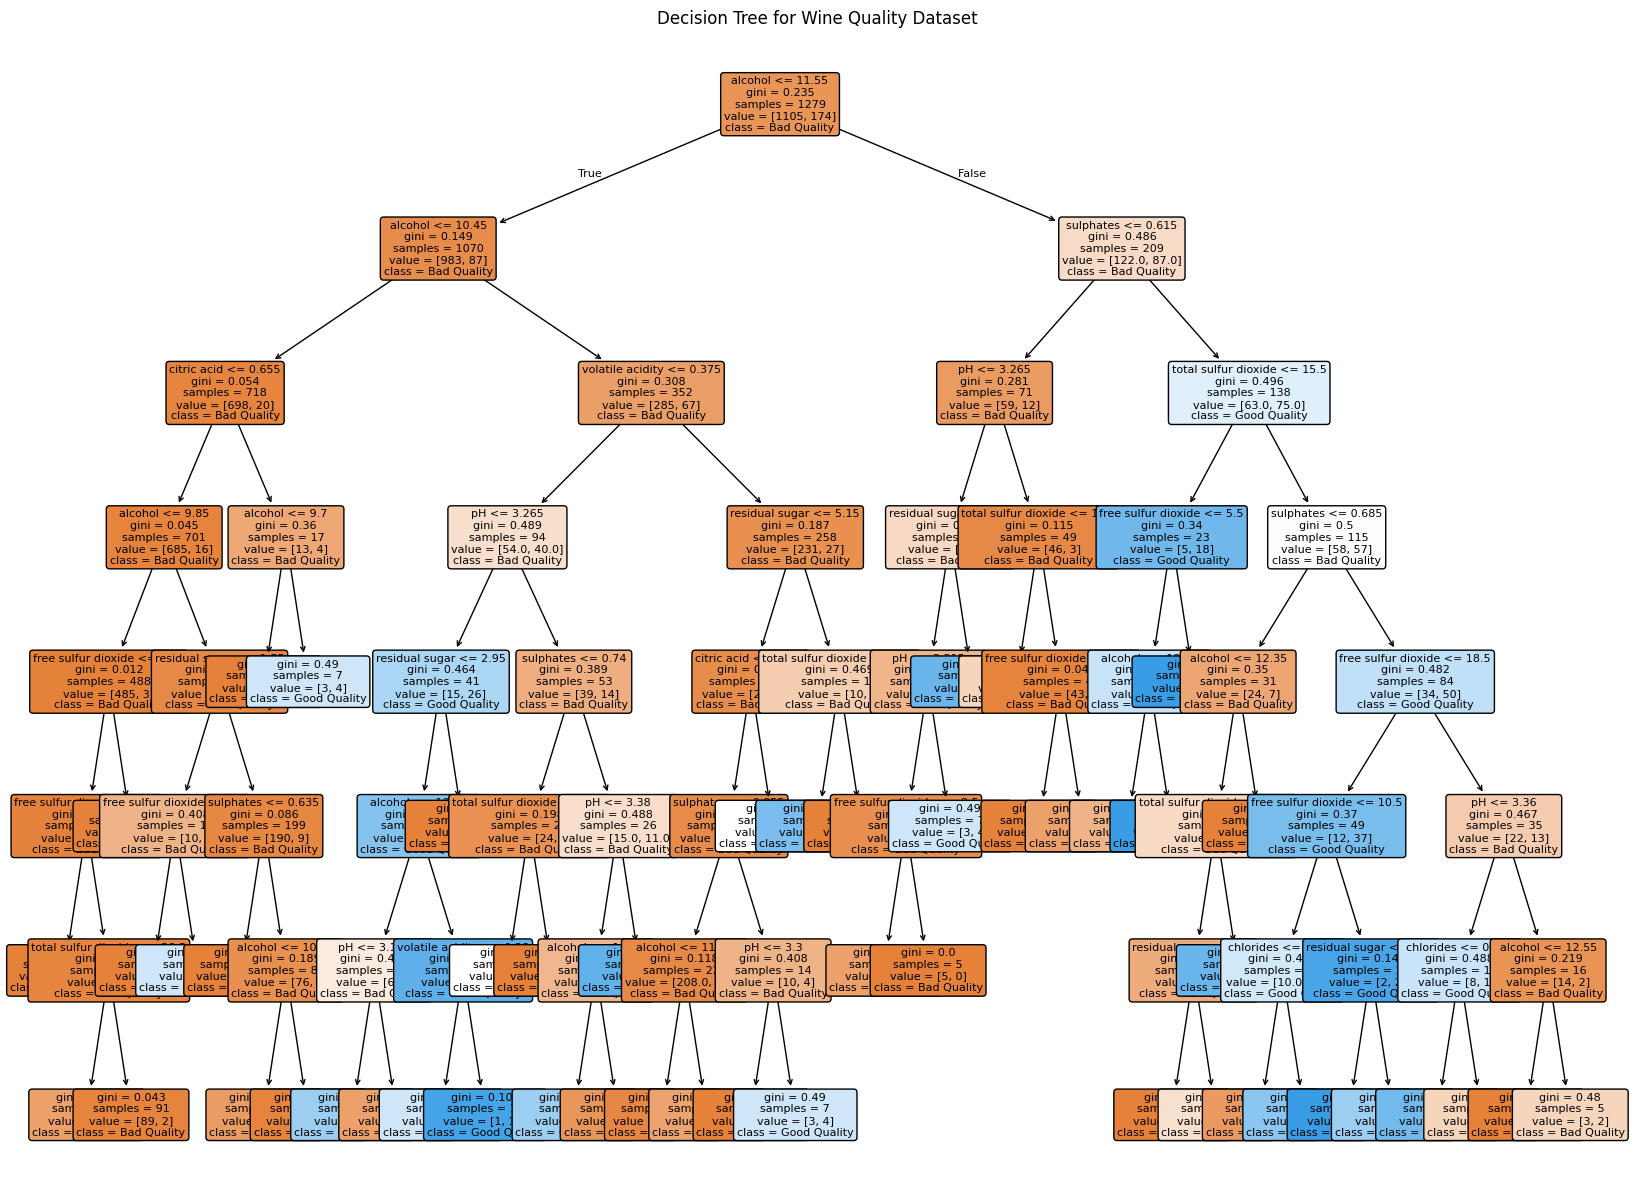

In [10]:
# Load and process the Wine Quality dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"

try:
    wine_df = pd.read_csv(wine_url, sep=';')

    wine_df['quality_label'] = wine_df['quality'].apply(lambda x: 1 if x >= 7 else 0)

    X = wine_df.drop(['quality', 'quality_label'], axis=1)
    y = wine_df['quality_label']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print(f"\nWine Train set size: {X_train.shape[0]} samples")
    print(f"Wine Test set size: {X_test.shape[0]} samples")

    dt_model = DecisionTreeClassifier(max_depth=7, min_samples_leaf=5, criterion='gini', random_state=42)
    dt_model.fit(X_train, y_train)

    y_pred = dt_model.predict(X_test)
    print(f"\n--- Wine Decision Tree Model Performance ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    plt.figure(figsize=(20, 15))
    plot_tree(dt_model,
              feature_names=X.columns.tolist(),
              class_names=['Bad Quality', 'Good Quality'],
              filled=True, rounded=True, fontsize=8)
    plt.title("Decision Tree for Wine Quality Dataset")
    plt.show()

except Exception as e:
    print(f"Error loading or processing Wine Quality dataset: {e}")
